In [4]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [5]:
# reading the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# reading the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer_churn.csv", index_col=0)

In [7]:
# The first 5 observation
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# The size of the data set
df.shape

(7043, 20)

In [9]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [10]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
5%,0.000000,1.000000,19.650000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
90%,1.000000,69.000000,102.600000
95%,1.000000,72.000000,107.400000


In [11]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [12]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['tenure', 'MonthlyCharges']

In [13]:
# Frequency of classes of dependent variable
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
# Customers leaving the bank
churn = df.loc[df["Churn"]=="Yes"]

In [15]:
# Customers who did not leave the bank
not_churn = df.loc[df["Churn"]=="No"]

Categorical Values

In [16]:
# Frequency of not_churn group according to Tenure
not_churn["tenure"].value_counts().sort_values()

,count
tenure,
0,11
36,40
39,42
28,45
44,45
21,46
38,46
31,49
37,50


In [17]:
# Frequency of churn group according to Tenure
churn["tenure"].value_counts().sort_values()

,count
tenure,
63,4
64,4
62,5
71,6
44,6
72,6
60,6
45,6
69,8


Data Processing

In [18]:
# # Missing Observation Analysis
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [19]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [20]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [21]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

tenure has  None Outliers
MonthlyCharges has  None Outliers


Feature Engineering

In [22]:
# we standardize tenure with age
df["NewTenure"] = df["tenure"]/72
df["NewMonthylCharges"] = pd.qcut(df['MonthlyCharges'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df["NewTotalCharges"] = pd.qcut(df['TotalCharges'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NewTenure,NewMonthylCharges,NewTotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.013889,2,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.472222,4,5
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.027778,3,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.625000,3,5
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.027778,5,2


One Hot Encoding

In [24]:
# Variables to apply one hot encoding
list = ["gender", "MultipleLines"]
df = pd.get_dummies(df, columns =list, drop_first = True)

In [25]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NewTenure,NewMonthylCharges,NewTotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.013889,2,1,False,True,False
5575-GNVDE,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.472222,4,5,True,False,False
3668-QPYBK,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.027778,3,1,True,False,False
7795-CFOCW,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.625000,3,5,True,True,False
9237-HQITU,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.027778,5,2,False,False,False


In [26]:
print(df.columns)


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'NewTenure', 'NewMonthylCharges', 'NewTotalCharges',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes'],
      dtype='object')


Scaling

In [27]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [28]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

# Identify columns that need scaling
new_cols_ohe = ["Gender_Male", "Multiple_Lines_Yes", "Multiple_Lines_No"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe and col not in "Exited" and col not in like_num]

# Encode categorical columns before scaling
for col in df.columns:
    if df[col].dtype == 'O':  # Check if column is categorical
        if len(df[col].value_counts()) <= 10:  # Check if it has fewer than or equal to 10 unique values
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

# Apply RobustScaler to numeric columns that need scaling
robust_scaler = RobustScaler()
for col in cols_need_scale:
    if df[col].dtype in ['int64', 'float64']:  # Make sure the column is numeric
        df[col] = robust_scaler.fit_transform(df[col].values.reshape(-1, 1))


In [29]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NewTenure,NewMonthylCharges,NewTotalCharges,gender_Male,MultipleLines_No phone service,MultipleLines_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1.0,0.0,-0.608696,-1.0,-1.0,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,-0.745170,-0.403038,0.0,-0.608696,2,1,False,True,False
5575-GNVDE,0,0.0,0.0,0.108696,0.0,-1.0,0.5,-0.5,0.5,-0.5,-0.5,-0.5,1.0,-1.0,1.0,-0.246550,0.145000,0.0,0.108696,4,5,True,False,False
3668-QPYBK,0,0.0,0.0,-0.586957,0.0,-1.0,0.5,0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,1.0,-0.303588,-0.379963,1.0,-0.586957,3,1,True,False,False
7795-CFOCW,0,0.0,0.0,0.347826,-1.0,-1.0,0.5,-0.5,0.5,0.5,-0.5,-0.5,1.0,-1.0,-2.0,-0.516099,0.130633,0.0,0.347826,3,5,True,True,False
9237-HQITU,0,0.0,0.0,-0.586957,0.0,0.0,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.006440,-0.367144,1.0,-0.586957,5,2,False,False,False


In [30]:
from sklearn.impute import SimpleImputer

# Create an imputer that replaces missing values with the median
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the relevant columns
df[['TotalCharges', 'NewTotalCharges']] = imputer.fit_transform(df[['TotalCharges', 'NewTotalCharges']])


In [31]:
print(df.isnull().sum())


SeniorCitizen                     0
Partner                           0
Dependents                        0
tenure                            0
PhoneService                      0
InternetService                   0
OnlineSecurity                    0
OnlineBackup                      0
DeviceProtection                  0
TechSupport                       0
StreamingTV                       0
StreamingMovies                   0
Contract                          0
PaperlessBilling                  0
PaymentMethod                     0
MonthlyCharges                    0
TotalCharges                      0
Churn                             0
NewTenure                         0
NewMonthylCharges                 0
NewTotalCharges                   0
gender_Male                       0
MultipleLines_No phone service    0
MultipleLines_Yes                 0
dtype: int64


In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# Assuming df is already prepared

# Train-Test Separation
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

# Models for Classification
models = [
    ('LR', LogisticRegression(random_state=123456)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=123456)),
    ('RF', RandomForestClassifier(random_state=123456)),
    ('SVR', SVC(gamma='auto', random_state=123456)),
    ('GB', GradientBoostingClassifier(random_state=12345)),
    ("LightGBM", LGBMClassifier(random_state=123456))
]

results = []
names = []

# Set shuffle=True to apply random_state
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=123456)  # shuffle=True
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.803064 (0.015051)
KNN: 0.775097 (0.013042)
CART: 0.730080 (0.017088)
RF: 0.795399 (0.016891)
SVR: 0.796960 (0.017506)
GB: 0.803207 (0.014884)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1693, number of negative: 4645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 6338, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267119 -> initscore=-1.009289
[LightGBM] [Info] Start training from score -1.009289
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1706, number of negative: 4632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhea

 GB Confusion Matrix

In [33]:
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[934, 186],
       [ 96, 193]])

In [34]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  193
True Negative :  934
False Positive:  186
False Negative:  96


In [35]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      1120
         1.0       0.51      0.67      0.58       289

    accuracy                           0.80      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.83      0.80      0.81      1409



In [36]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

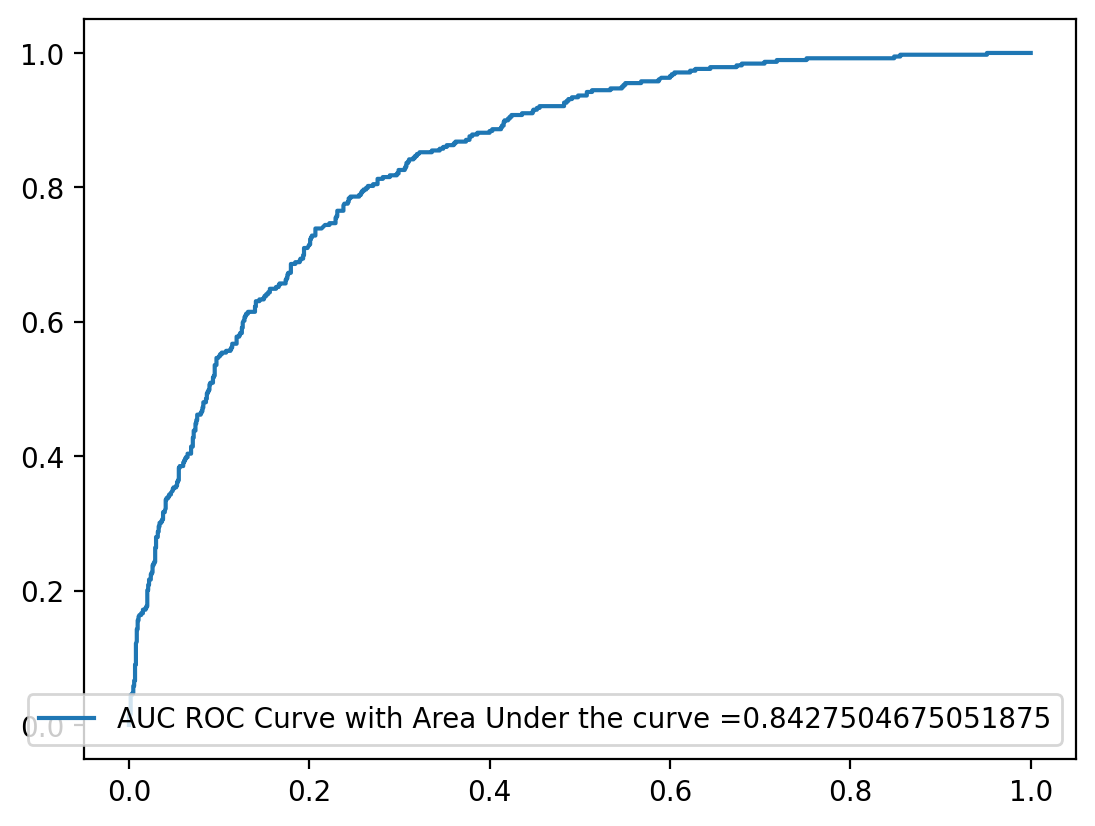

In [37]:
generate_auc_roc_curve(model_GB, X_test)

Model Tuning

In [38]:
# LightGBM:
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [39]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)

In [40]:
# evaluate each model in turn
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=123456)  # shuffle=True
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1693, number of negative: 4645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 6338, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267119 -> initscore=-1.009289
[LightGBM] [Info] Start training from score -1.009289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1490, number of negative: 4144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264466 -> initscore=-1.022885
[LightGBM] [Info] Start training from score -1.022885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

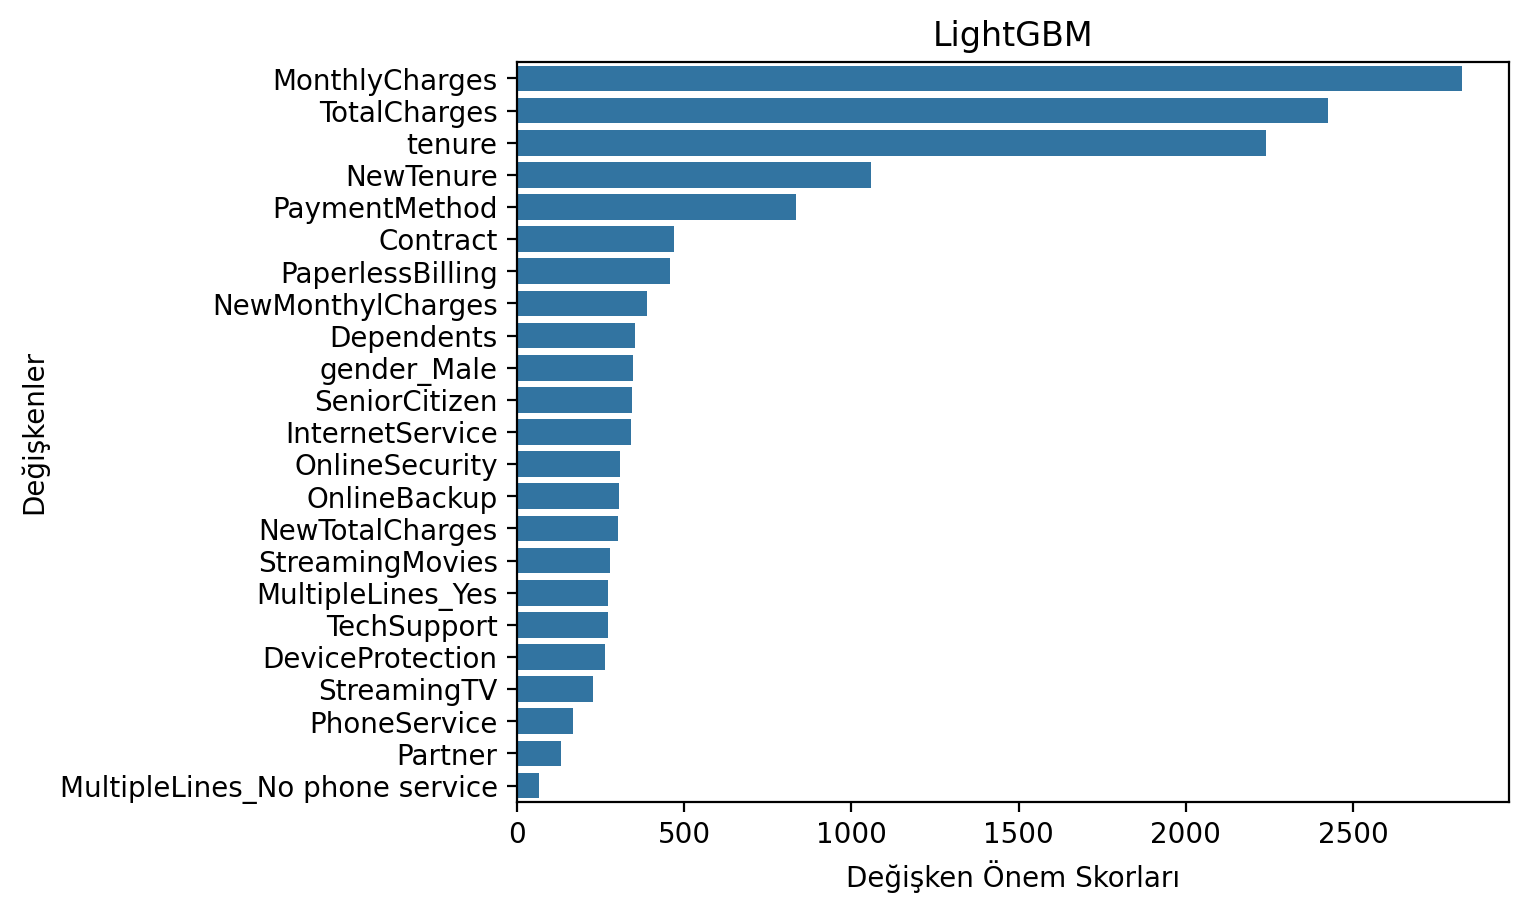

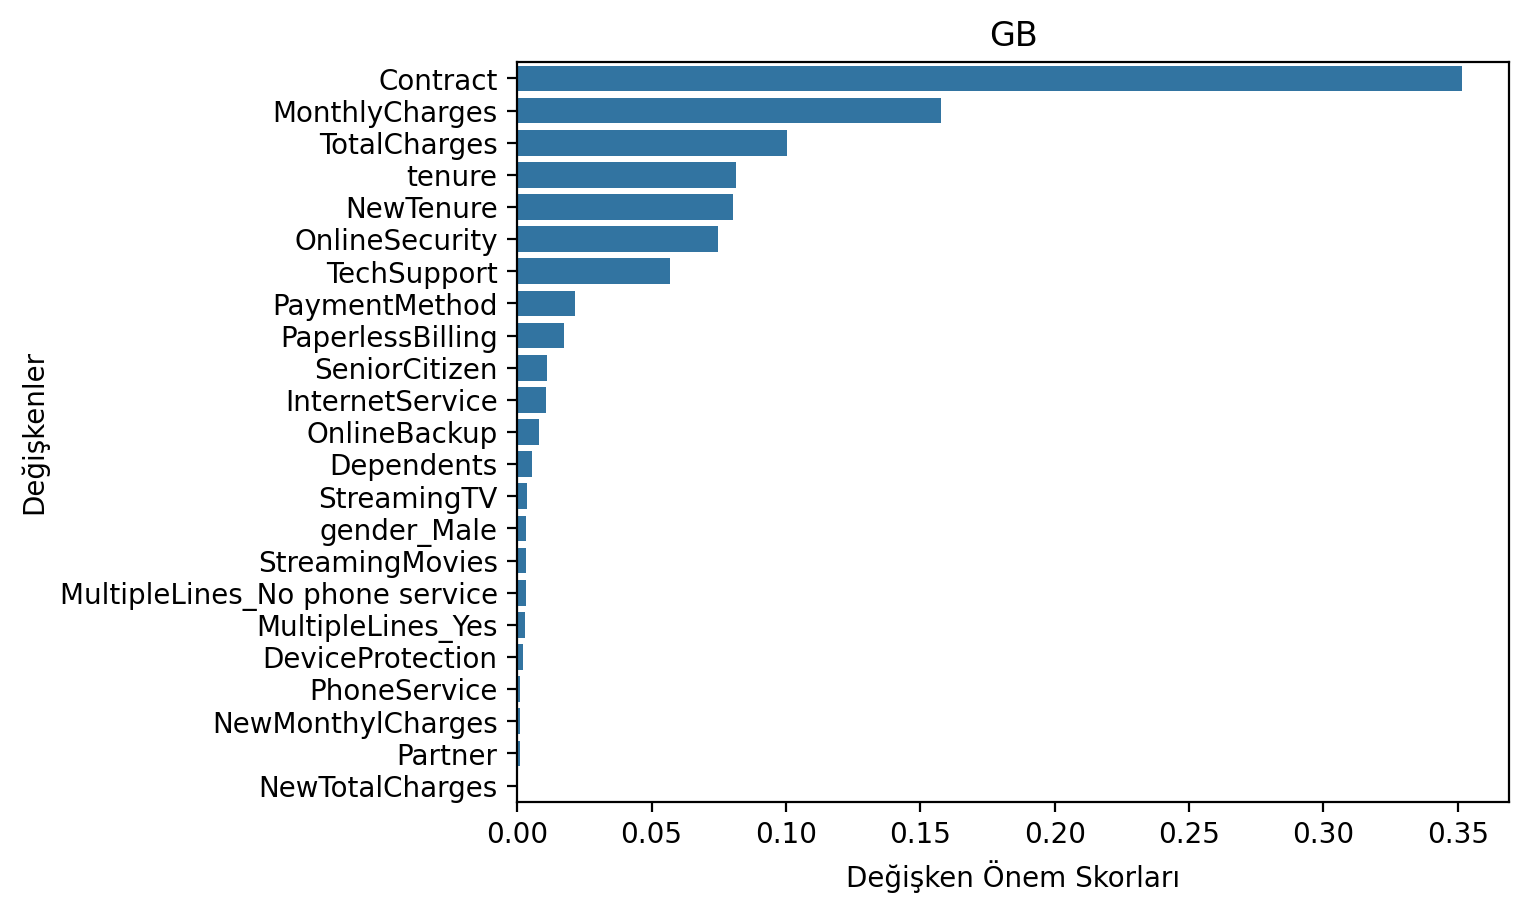

In [41]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()